In [1]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
from mlxtend.data import iris_data
from mlxtend.classifier import EnsembleVoteClassifier
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions
from IPython.display import IFrame
from sklearn.datasets import load_iris

In [2]:
plt.rcParams["figure.figsize"] = (16,16)

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pandas.read_csv(url, names=names)
print(df.shape)
print(df.head(150))
print(df.groupby('class').size())

(150, 5)
     sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
6             4.6          3.4           1.4          0.3     Iris-setosa
7             5.0          3.4           1.5          0.2     Iris-setosa
8             4.4          2.9           1.4          0.2     Iris-setosa
9             4.9          3.1           1.5          0.1     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
11            4.8          3.4           1.6          0.2     Iris-setosa
12            4.8          3.

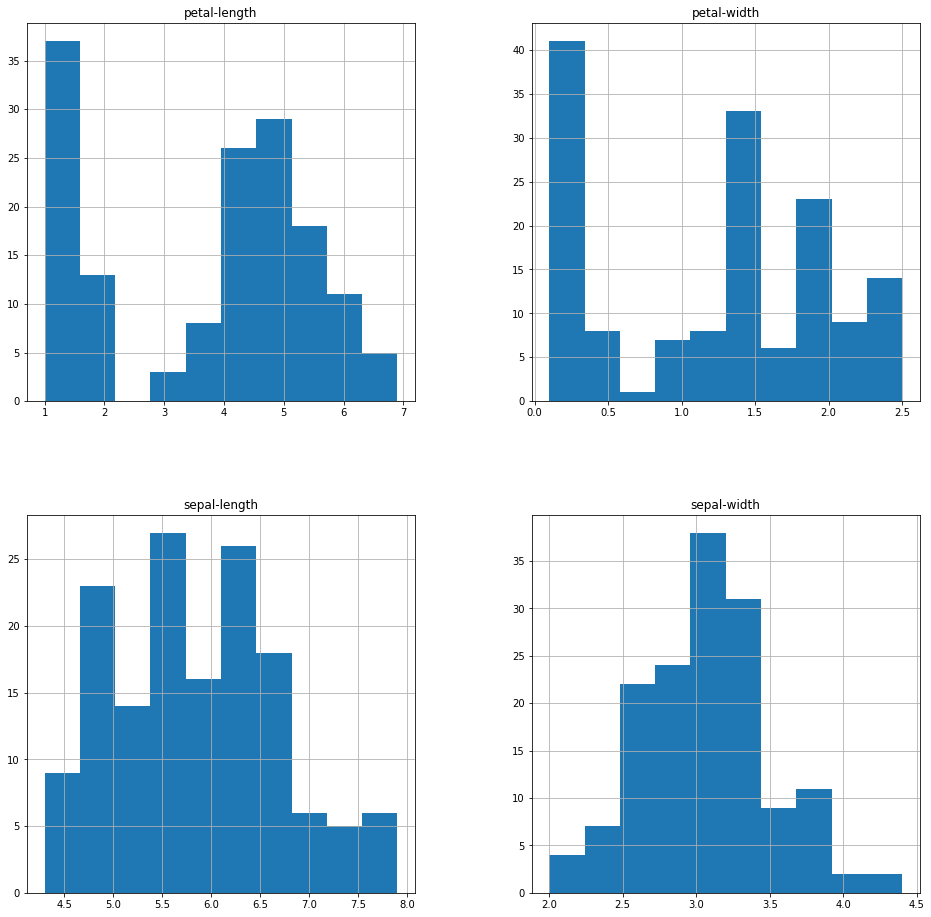

In [4]:
df.hist()
plt.show()

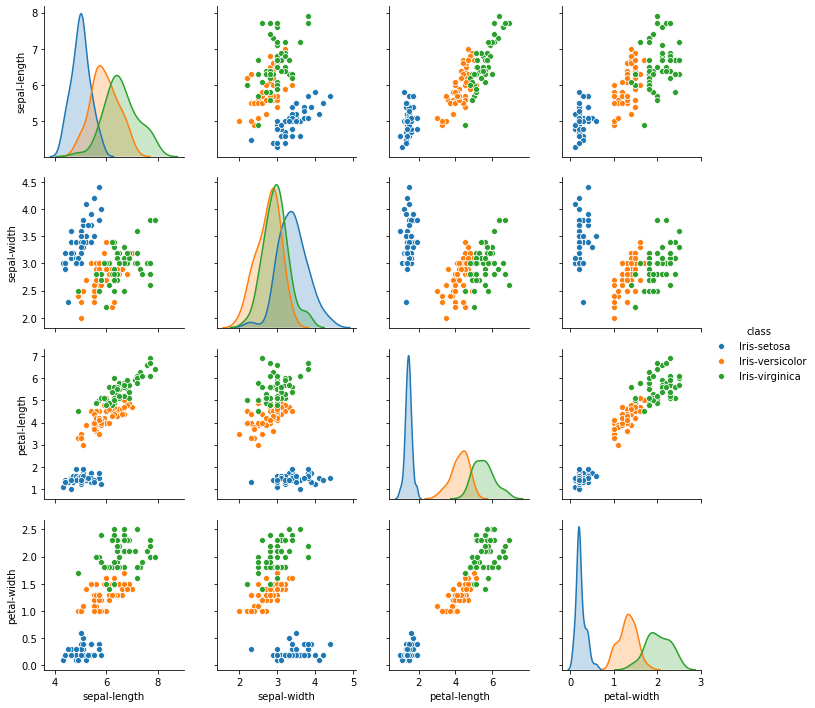

In [5]:
sns.pairplot(df, hue="class")
plt.show()

# Classification Algorithms

In [6]:
clf1 = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=0)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = SVC(random_state=0, kernel='rbf', probability=True, gamma='auto')
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],
                              weights=[1, 1, 1], voting='soft')

X, y = iris_data()
X = X[:,[0,2]]


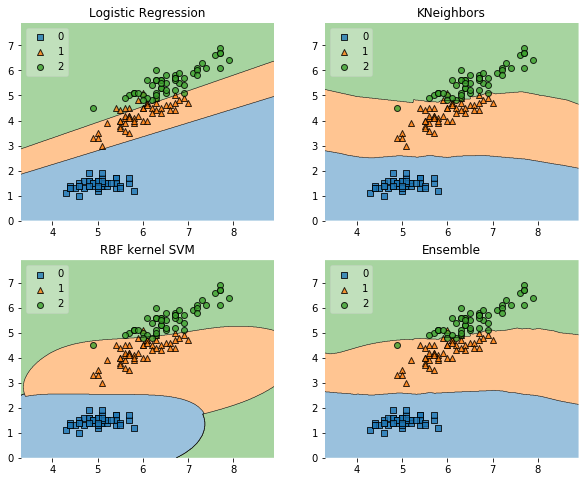

In [7]:
# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
          'KNeighbors',
          'RBF kernel SVM',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

# K-fold Cross-validation

array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

![k-fold](http://karlrosaen.com/ml/learning-log/2016-06-20/k-fold-diagram.png)

In [8]:
dataset = pandas.read_csv(url, names=names)

array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


seed = 7
scoring = 'accuracy'

models = []
models.append(('LR', clf1))
models.append(('KN', clf2))
models.append(('RBF', clf3))
models.append(('EN', eclf))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
KN: 0.975000 (0.038188)
RBF: 0.991667 (0.025000)
EN: 0.975000 (0.038188)


In [9]:
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=300, height=200)

iris = load_iris()
type(iris)

X = iris.data
y = iris.target

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

lr = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=0)
lr.fit(X, y)

rbf = SVC(random_state=0, kernel='rbf', probability=True, gamma='auto')
rbf.fit(X, y)


X_new = [[2.5, 5.0, 0.4, 0.2]]
X_new2 = [[3.0, 5.2, 1.2, 0.2], [4.0, 4.0, 5.2, 0.8]]
print('Responses: (0 = setosa, 1 = versicolor, 2 = virginica)')

print('\nPrediction for Iris with measurements: ')
print(X_new)


print('\nKNN Response:')
print(knn.predict(X_new))

print('\nRBF Response:')
print(rbf.predict(X_new))

print('\nLR Response:')
print(lr.predict(X_new))



print('\n\nPrediction for Irises with measurements: ')
print(X_new2)

print('\nKNN Response:')
print(knn.predict(X_new2))

print('\nRBF Response:')
print(rbf.predict(X_new2))

print('\nLR Response:')
print(lr.predict(X_new2))



Responses: (0 = setosa, 1 = versicolor, 2 = virginica)

Prediction for Iris with measurements: 
[[2.5, 5.0, 0.4, 0.2]]

KNN Response:
[0]

RBF Response:
[2]

LR Response:
[0]


Prediction for Irises with measurements: 
[[3.0, 5.2, 1.2, 0.2], [4.0, 4.0, 5.2, 0.8]]

KNN Response:
[0 1]

RBF Response:
[0 1]

LR Response:
[0 2]
